# US Accidents Exploratary Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

## Questions
- What are the top cities/states in accidents
- Is accidents more in colder areas or warmer areas
- At what time the accidents are more
- In which month accidents are more
- What is trend of accidents over years
- How is the accidents located in the maps


## Reading the Data


In [2]:
df=pd.read_csv('US_Accidents_Dec20.csv')

## City Data analysis

#### Number of Cities

In [4]:
len(df.City.unique())

12251

#### Number of accidents in each city

In [5]:
city_accid=df.City.value_counts()
city_accid

Houston        114905
Los Angeles     92701
Charlotte       88887
Dallas          77303
Austin          70538
                ...  
Brussels            1
Elk Garden          1
Colliers            1
Briggs              1
Hersey              1
Name: City, Length: 12250, dtype: int64

#### Top20 cities 

In [6]:
city_accid[:20]

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
San Diego         29416
Seattle           28004
Richmond          27907
San Antonio       27516
Jacksonville      24009
Name: City, dtype: int64

<AxesSubplot:>

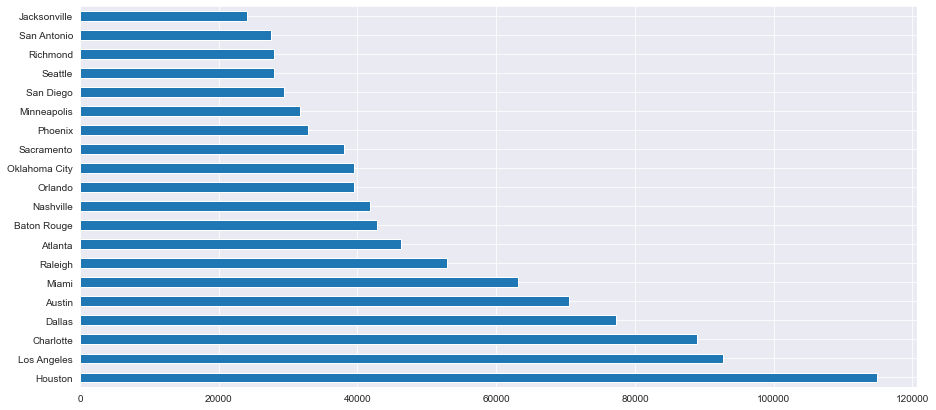

In [7]:
city_accid[:20].plot(kind='barh',figsize=(15,7))

## State Data Analysis

<AxesSubplot:>

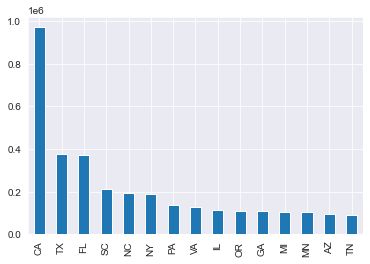

In [74]:
df.State.value_counts()[:15].plot(kind='bar')

It is reported that California state has most number of accidants

#### Historgram Plot

In [8]:
high_acc_cities=city_accid[city_accid>=1000]
low_acc_cities=city_accid[city_accid<1000]

In [9]:
len(high_acc_cities)

704

In [10]:
len(low_acc_cities)

11546

<AxesSubplot:xlabel='City', ylabel='Count'>

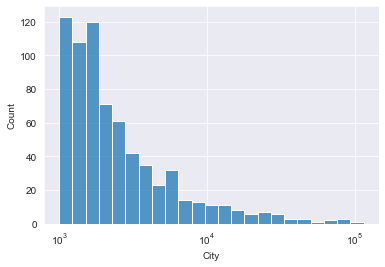

In [11]:
sns.histplot(high_acc_cities,log_scale=True)

<AxesSubplot:xlabel='City', ylabel='Count'>

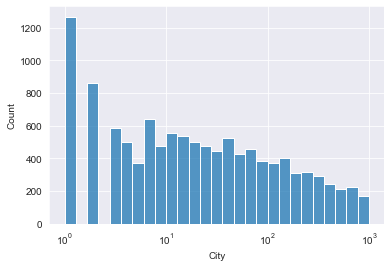

In [12]:
sns.histplot(low_acc_cities,log_scale=True)

#### Insights
- No data for New York City
- No of accidents per city decreases exponentially
- Less than 5% cities have more than 1000 yearly accidents
-  Over 1200 cities have reported Just one accident 

## Start Time Analysis

In [13]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
4232536    2019-08-23 18:03:25
4232537    2019-08-23 19:11:30
4232538    2019-08-23 19:00:21
4232539    2019-08-23 19:00:21
4232540    2019-08-23 18:52:06
Name: Start_Time, Length: 4232541, dtype: object

In [14]:
df.Start_Time=pd.to_datetime(df.Start_Time)

In [15]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

### Calculating accidents per hour of the day

Text(0, 0.5, 'No of accidents')

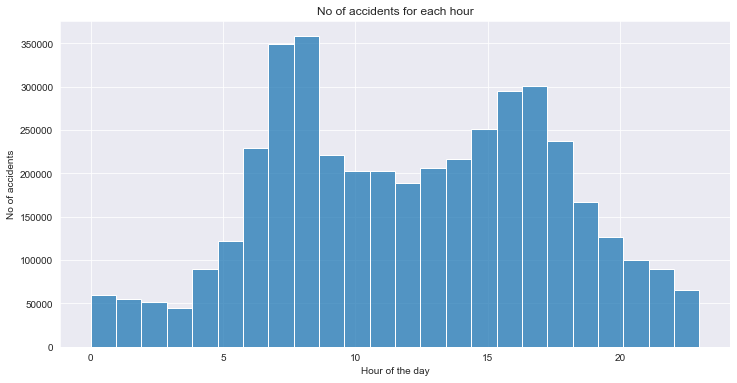

In [16]:
plt.figure(figsize=(12,6))
ax=sns.histplot(df.Start_Time.dt.hour,bins=24)
ax.set_title("No of accidents for each hour")
ax.set_xlabel('Hour of the day')
ax.set_ylabel("No of accidents")

You can observe that more accidents were happened at hours between 6 to 9 in the morning. Also 3 to 6 in the evening. This might be the because most of them would leave to office and comming back to home

### Calculating accidents per day of the week

<ipython-input-17-13c12fa18aa2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=['','Mon','Tue','Wed','Thu','Fri','Sat','Sun'])


[[Text(-1.0, 0, ''),
  Text(0.0, 0, 'Mon'),
  Text(1.0, 0, 'Tue'),
  Text(2.0, 0, 'Wed'),
  Text(3.0, 0, 'Thu'),
  Text(4.0, 0, 'Fri'),
  Text(5.0, 0, 'Sat'),
  Text(6.0, 0, 'Sun'),
  Text(7.0, 0, '')]]

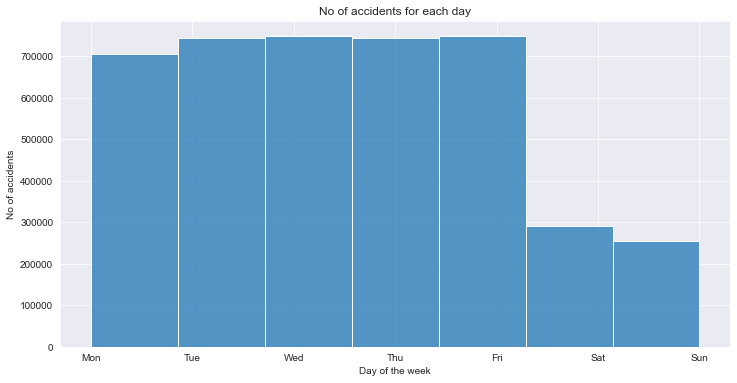

In [17]:
plt.figure(figsize=(12,6))
ax=sns.histplot(df.Start_Time.dt.dayofweek,bins=7)
ax.set_title("No of accidents for each day")
ax.set_xlabel('Day of the week')
ax.set_ylabel("No of accidents")
ax.set(xticklabels=['','Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

You can observe here that no of accidents are more in week days than in the weekends

Lets check if the distribution also follows on weekends

Text(0, 0.5, 'No of accidents')

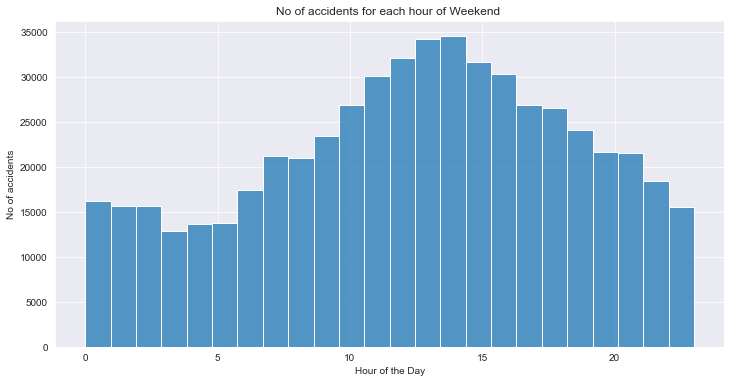

In [18]:
plt.figure(figsize=(12,6))
ax=sns.histplot(df.Start_Time.dt.hour[(df.Start_Time.dt.dayofweek==6) | (df.Start_Time.dt.dayofweek==5) ],bins=24)
ax.set_title("No of accidents for each hour of Weekend ")
ax.set_xlabel('Hour of the Day')
ax.set_ylabel("No of accidents")



Text(0, 0.5, 'No of accidents')

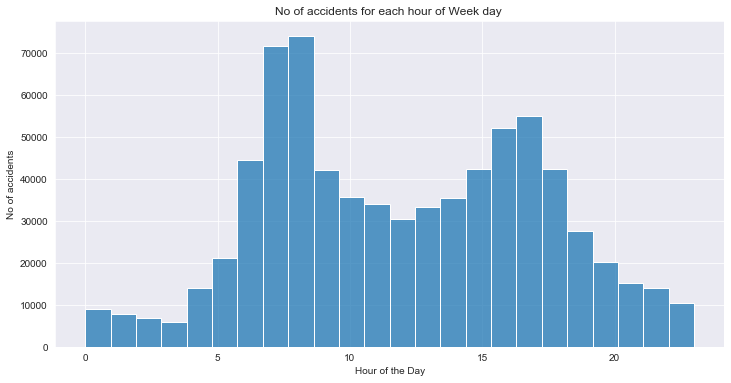

In [19]:
plt.figure(figsize=(12,6))
ax=sns.histplot(df.Start_Time.dt.hour[df.Start_Time.dt.dayofweek==1],bins=24)
ax.set_title("No of accidents for each hour of Week day ")
ax.set_xlabel('Hour of the Day')
ax.set_ylabel("No of accidents")

Now here the distribution of accidents on weekends is not same as weekend. In the weekends accidents are more in the afternoon time 12 to 3pm. This might be due to in the weekends most of them are not going to office instead they come out in the afternoon for shopping, food, or party. But overally if you observe the count of accidents, it is more in week day than in weekends


## Calculating Accidents in each month

Text(0, 0.5, 'No of accidents')

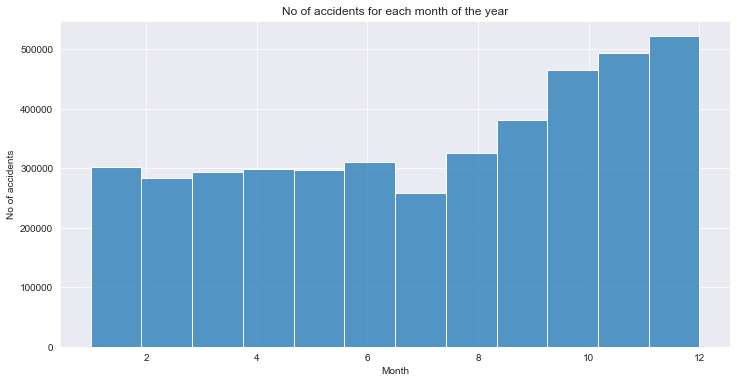

In [20]:
plt.figure(figsize=(12,6))
ax=sns.histplot(df.Start_Time.dt.month,bins=12)
ax.set_title("No of accidents for each month of the year")
ax.set_xlabel('Month')
ax.set_ylabel("No of accidents")


You can observe that the accidents are more in the year end months i.e. Oct, Nov and Dec. This is may be due to it is winter and snow

## Accidents trend over the year

<AxesSubplot:>

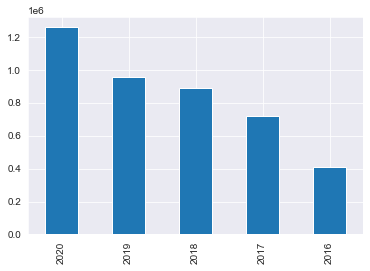

In [26]:
df.Start_Time.dt.year.value_counts().plot(kind='bar')


In [ ]:
It is clearly visible that the accidents are keep on increasing over the years

## Weathercondition effect on Accidents

In [95]:
df.Weather_Condition.value_counts().nlargest(15)

Fair                900872
Clear               808181
Mostly Cloudy       571743
Partly Cloudy       397415
Overcast            382485
Cloudy              323340
Light Rain          206389
Scattered Clouds    204661
Light Snow           57148
Rain                 48641
Haze                 46794
Fog                  45912
Heavy Rain           18223
Light Drizzle        14594
Fair / Windy         11396
Name: Weather_Condition, dtype: int64

<AxesSubplot:>

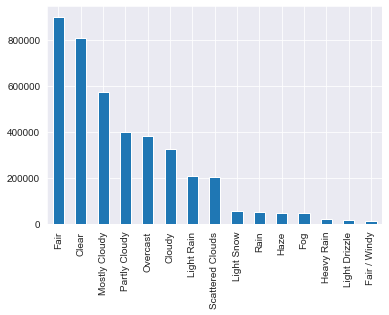

In [28]:
Weather_Condition=df.Weather_Condition.value_counts().nlargest(15)
Weather_Condition.plot(kind='bar')

To be suprized most of the accidents are happened when the weather is fair and clear. I didnt expected this

## Temperature Analysis

In [82]:
df.rename(columns={'Temperature(F)':'Temperature'},inplace=True)


In [84]:
max(df.Temperature)

203.0

### Temperature categorization

Temp    TempCat
<-50 ==> 0
-50 to 0 ==>1
0 to 50 ==>2
50 to 100 ==> 3
100 to 150==>4
150 to 200 ==>5
>200 ===> 6

In [85]:
def temp_cat(temp):
    if temp<(-50):
        return 0
    elif temp>=-50 and temp<0:
        return 1
    elif temp>=0 and temp<50:
        return 2
    elif temp>=50 and temp<100:
        return 3
    elif temp>=100 and temp<150:
        return 4
    elif temp>=150 and temp<200:
        return 5
    else: 
        return 6

df['TempCat']=df['Temperature'].apply(temp_cat)

In [94]:
df.TempCat.value_counts()

3    3081259
2    1037142
6      89901
4      17678
1       6530
0         23
5          8
Name: TempCat, dtype: int64

<AxesSubplot:>

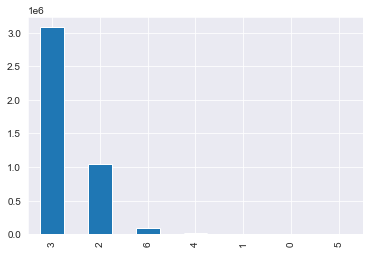

In [93]:
df.TempCat.value_counts().plot(kind='bar')

It is seen that maximum accidents happend when the temperatures are 0 to 100 Faranheits. that is when temperature is normal. When temperatures are normal, people will tends to go out results accidents

## Source Data

<AxesSubplot:ylabel='Source'>

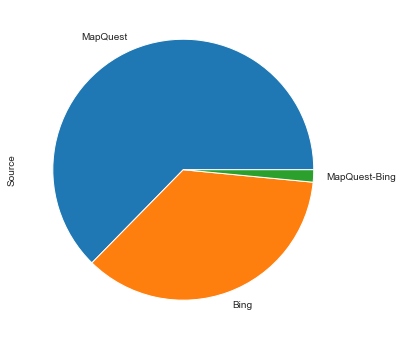

In [32]:
df.Source.value_counts().plot(kind='pie',figsize=(10,6))

## Location Analysis

In [34]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
4232536    34.002480
4232537    32.766960
4232538    33.775450
4232539    33.992460
4232540    34.133930
Name: Start_Lat, Length: 4232541, dtype: float64

In [36]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
4232536   -117.379360
4232537   -117.148060
4232538   -117.847790
4232539   -118.403020
4232540   -117.230920
Name: Start_Lng, Length: 4232541, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

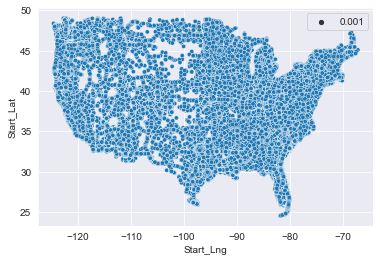

In [39]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,size=0.001)

Above line of code will take time to plot the scatter as it has 4.2 million data points

So lets take the sample data points 

In [67]:
sample_df=df.sample(int(0.002*len(df)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

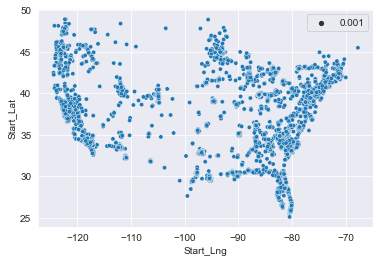

In [68]:
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat,size=0.001)

You can observe that the accidents are happened in coastal areas. Only these are the populated countries

### Lets plot it in the map

In [64]:
import folium
from folium.plugins import HeatMap

In [69]:
lat_lon_pairs=list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [70]:
map=folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map